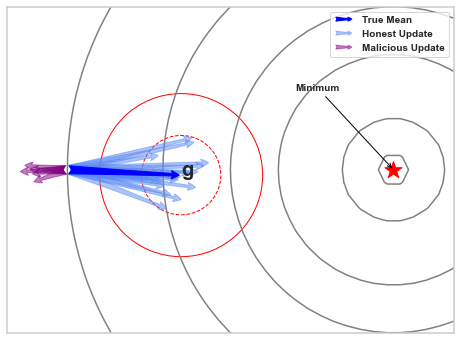

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.patches import FancyArrowPatch, ArrowStyle


plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["savefig.format"] = 'pdf'

cmap = plt.cm.coolwarm
sd = 3
benign_size = 20
malicious_size = 5

class AnnotationHandler(HandlerLine2D):
    def __init__(self, ms, *args, **kwargs):
        self.ms = ms
        HandlerLine2D.__init__(self, *args, **kwargs)

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize,
                       trans):
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent,
                                             width, height, fontsize)
        ydata = ((height - ydescent) / 2.) * np.ones(len(xdata), float)
        legline = FancyArrowPatch(posA=(xdata[0], ydata[0]),
                                  posB=(xdata[-1], ydata[-1]),
                                  mutation_scale=self.ms,
                                  **orig_handle.arrowprops)
        legline.set_transform(trans)
        return legline,


def plot_contour(cur_point, benign, malicious, bound=True, xlim=(-1.2, 1.2), ylim=(0, 2), optim=(1.0, 1.0), optim_annot=(0.4, 1.5)):
    cir_center = np.mean(benign, axis=0)
    fig, ax = plt.subplots(figsize=(8, 6))
    nx = 101
    ny = 105
    xvec = np.linspace(-4, 4.0, nx)
    yvec = np.linspace(-4, 4.0, ny)

    x1, x2 = np.meshgrid(xvec, yvec)
    obj = x1 ** 2 + x2 ** 2 - 2 * x1 - 2 * x2 + 2
    ax.scatter(optim[0], optim[1], s=320, marker='*', color='red', zorder=3)
    ax.annotate('Minimum', xy=optim, xytext=optim_annot,
                arrowprops={'arrowstyle': '->', 'color': 'k'}, va='center')
    cntr = ax.contour(x1, x2, obj, [0.01, 0.1, 0.5, 1, 2, 4, 8, 16], colors='gray')
    
    if bound:
        redius = max([np.linalg.norm(e - cir_center) for e in benign])
        cir1 = plt.Circle(cir_center, redius, color='red', fill=False, linestyle='--')
        ax.add_patch(cir1)
        
        cir1 = plt.Circle(cir_center, 0.5, color='red', fill=False)
        ax.add_patch(cir1)

    for d in benign:
        benign_handler = ax.annotate('', xy=d, xytext=cur_point,
                                     arrowprops=dict(
                                         arrowstyle=ArrowStyle("Fancy", head_length=.8, head_width=.8, tail_width=.8),
                                         alpha=0.5, color="#5D8BF4"), label="Honest Update")

    for d in malicious:
        malicious_handler = ax.annotate('', xy=d, xytext=cur_point,
                                        arrowprops=dict(arrowstyle=ArrowStyle("Fancy", head_length=.8, head_width=.8,
                                         tail_width=.8), alpha=0.5,
                                                        color="purple"), label="Malicious Update")

    true_mean = ax.annotate('', xy=cir_center, xytext=cur_point,
                            arrowprops=dict(
                                arrowstyle=ArrowStyle("Fancy", head_length=.8, head_width=.8, tail_width=.8),
                                color="blue"), label="True Mean")

    ax.annotate('g', (cir_center[0], cir_center[1]), fontsize=20)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    plt.gca().set_aspect('equal', adjustable='datalim')
    ax.set_xticks([])
    ax.set_yticks([])

    ax.legend(handles=[true_mean, benign_handler, malicious_handler],
              handler_map={type(true_mean): AnnotationHandler(5)})

    return fig, ax

cur_point = np.array([-1, 1])
np.random.seed(sd)
sz = 40
sample_sz = 30
mean = np.array((-0.3, 1))
cov = np.array([[0.01, 0], [0, 0.01]])
benign = np.random.multivariate_normal(mean, cov, benign_size)
malicious = np.random.multivariate_normal((-1.2, 1), 0.2 * cov, malicious_size)
plot_contour(cur_point, benign, malicious)
plt.savefig("large_mean.pdf", bbox_inches="tight")

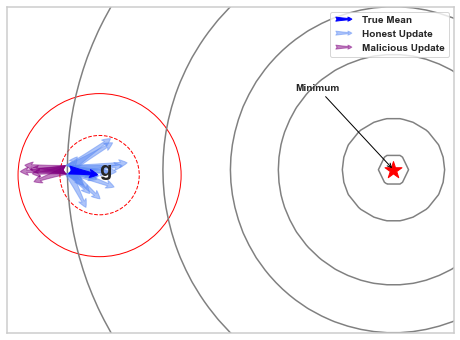

In [9]:
cur_point = np.array([-1, 1])
np.random.seed(sd)
mean = np.array((-0.8, 1))
cov = np.array([[0.01, 0], [0, 0.01]])
benign = np.random.multivariate_normal(mean, cov, benign_size)
malicious = np.random.multivariate_normal((-1.2, 1), 0.2 * cov, malicious_size)
plot_contour(cur_point, benign, malicious)
plt.savefig("small_mean.pdf", bbox_inches="tight")

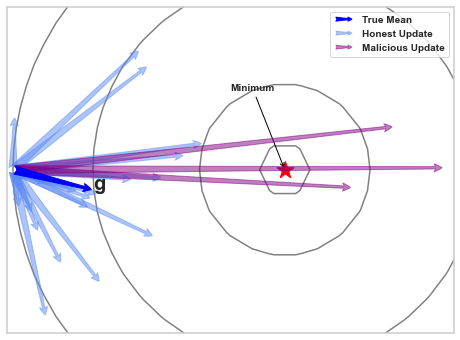

In [10]:
cur_point = np.array([-0., 1])
np.random.seed(sd)
mean = np.array((0.3, 1))
cov = np.array([[0.05, 0], [0, 0.05]])
benign = np.random.multivariate_normal(mean, cov, benign_size)

malicious = np.random.multivariate_normal([1.8, 1], 1.2 * cov, malicious_size)
plot_contour(cur_point, benign, malicious, bound=False, xlim=(-0, 1.6), ylim=(0.4, 1.6), optim=(1.0, 1.0), optim_annot=(0.8, 1.3))
plt.savefig("scaling_atk.pdf", bbox_inches="tight")

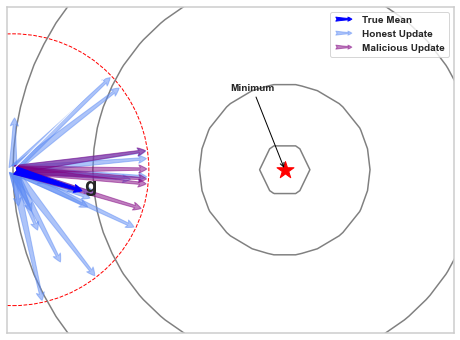

In [11]:
cur_point = np.array([-0., 1])

np.random.seed(sd)
mean = np.array((0.3, 1))
cov = np.array([[0.05, 0], [0, 0.05]])
benign = np.random.multivariate_normal(mean, cov, benign_size)

malicious = np.random.multivariate_normal([1.5, 1], 1.2 * cov, malicious_size)

tau = 0.5
for i in range(len(malicious)):
    l2_norm = np.linalg.norm(malicious[i] - cur_point)
    if l2_norm > tau:
        malicious[i] = (malicious[i] - cur_point) * tau / l2_norm + cur_point

for i in range(len(benign)):
    l2_norm = np.linalg.norm(benign[i] - cur_point)
    if l2_norm > tau:
        benign[i] = (benign[i] - cur_point) * tau / l2_norm + cur_point

fig, ax = plot_contour(cur_point, benign, malicious, bound=False, xlim=(-0, 1.6), ylim=(0.4, 1.6), optim=(1.0, 1.0), optim_annot=(0.8, 1.3))

cir1 = plt.Circle(cur_point, tau, color='red', fill=False, linestyle='--')
ax.add_patch(cir1)

ax.annotate('', xy=cur_point, xytext= np.sqrt(tau ** 2 / 2) * np.ones_like(cur_point) + cur_point, arrowprops={'arrowstyle': '-'}, va='center')
plt.savefig("clipped_atk.pdf", bbox_inches="tight")